1. Importar Librerías y Leer los Archivos CSV

In [2]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leer el archivo CSV de la felicidad
happiness = pd.read_csv('Happiness_report.csv')

# Verificación de los datos cargados
print("Primeros registros del dataframe happiness:")
print(happiness.head())
print("\nInformación del dataframe happiness:")
print(happiness.info())


Primeros registros del dataframe happiness:
   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1   

2. Filtrar los Datos de México y Establecer el Índice

In [3]:
# Filtrar el dataframe para obtener solo los datos de México y establecer 'Country or region' como índice
mexico = happiness[happiness['Country or region'] == 'Mexico'].set_index('Country or region')

# Verificación de los datos de México
print("\nDatos de México:")
print(mexico)



Datos de México:
                   Overall rank  Score  GDP per capita  Social support  \
Country or region                                                        
Mexico                       23  6.595            1.07           1.323   

                   Healthy life expectancy  Freedom to make life choices  \
Country or region                                                          
Mexico                               0.861                         0.433   

                   Generosity  Perceptions of corruption  
Country or region                                         
Mexico                  0.074                      0.073  


3. Histograma del Puntaje (Score)


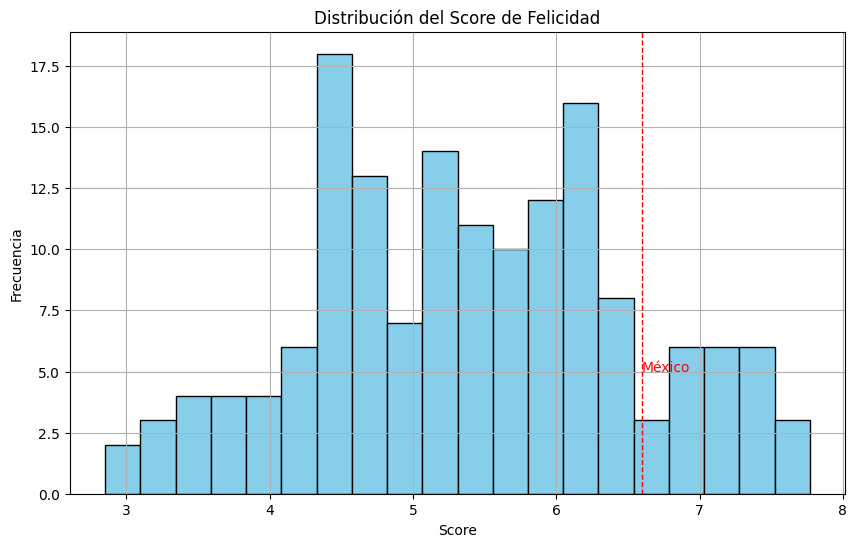

In [4]:
# Crear un histograma del puntaje (score)
plt.figure(figsize=(10, 6))
plt.hist(happiness['Score'], bins=20, color='skyblue', edgecolor='black')
plt.axvline(mexico['Score'].values[0], color='red', linestyle='dashed', linewidth=1)
plt.text(mexico['Score'].values[0], 5, 'México', color = 'red')
plt.title('Distribución del Score de Felicidad')
plt.xlabel('Score')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


4. Boxplot de la Esperanza de Vida (Healthy Life Expectancy)


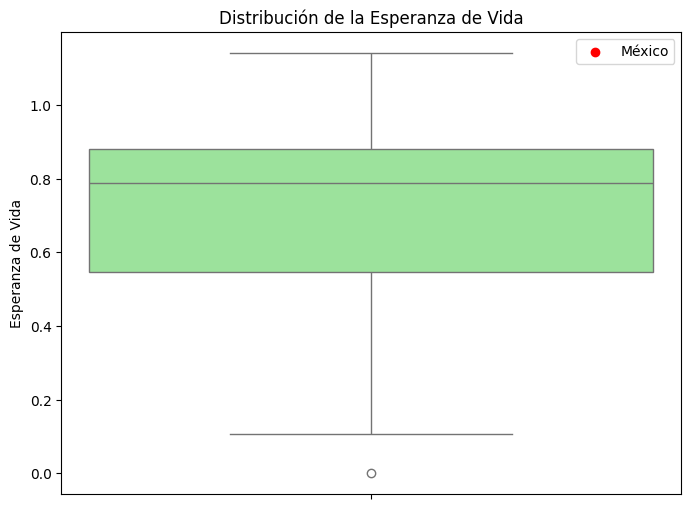

In [5]:
# Crear un boxplot para la columna 'Healthy life expectancy'
plt.figure(figsize=(8, 6))
sns.boxplot(data=happiness, y='Healthy life expectancy', color='lightgreen')
plt.scatter(x=0, y=mexico['Healthy life expectancy'].values[0], color='red', label='México')
plt.title('Distribución de la Esperanza de Vida')
plt.ylabel('Esperanza de Vida')
plt.legend()
plt.show()


5. Gráfica Circular de los Factores de Felicidad para México


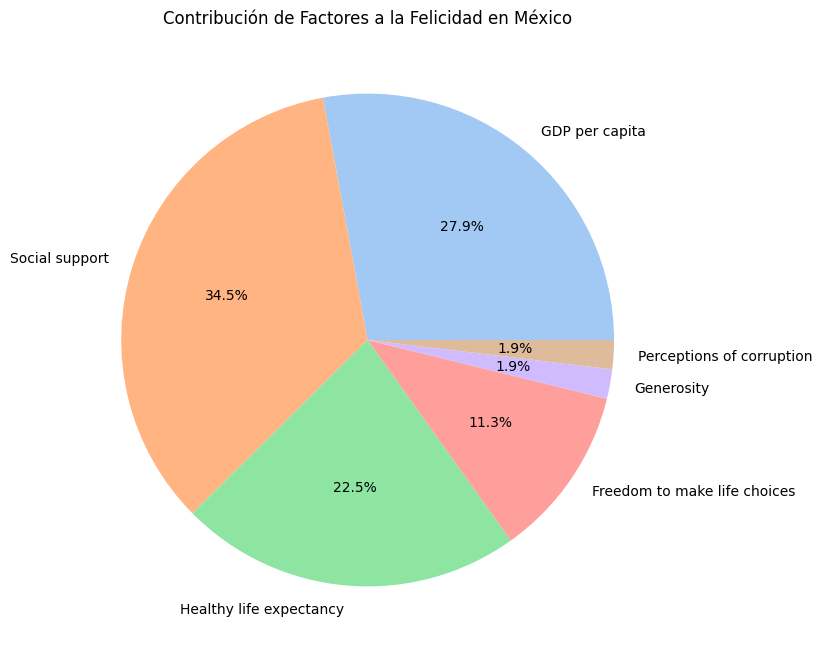

In [6]:
# Extraer los factores relevantes y crear una gráfica circular para México
factors = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
mexico_factors = mexico[factors].transpose()

plt.figure(figsize=(8, 8))
plt.pie(mexico_factors.values.flatten(), labels=factors, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Contribución de Factores a la Felicidad en México')
plt.show()


6. Gráfica de Barras para 5 Países Seleccionados


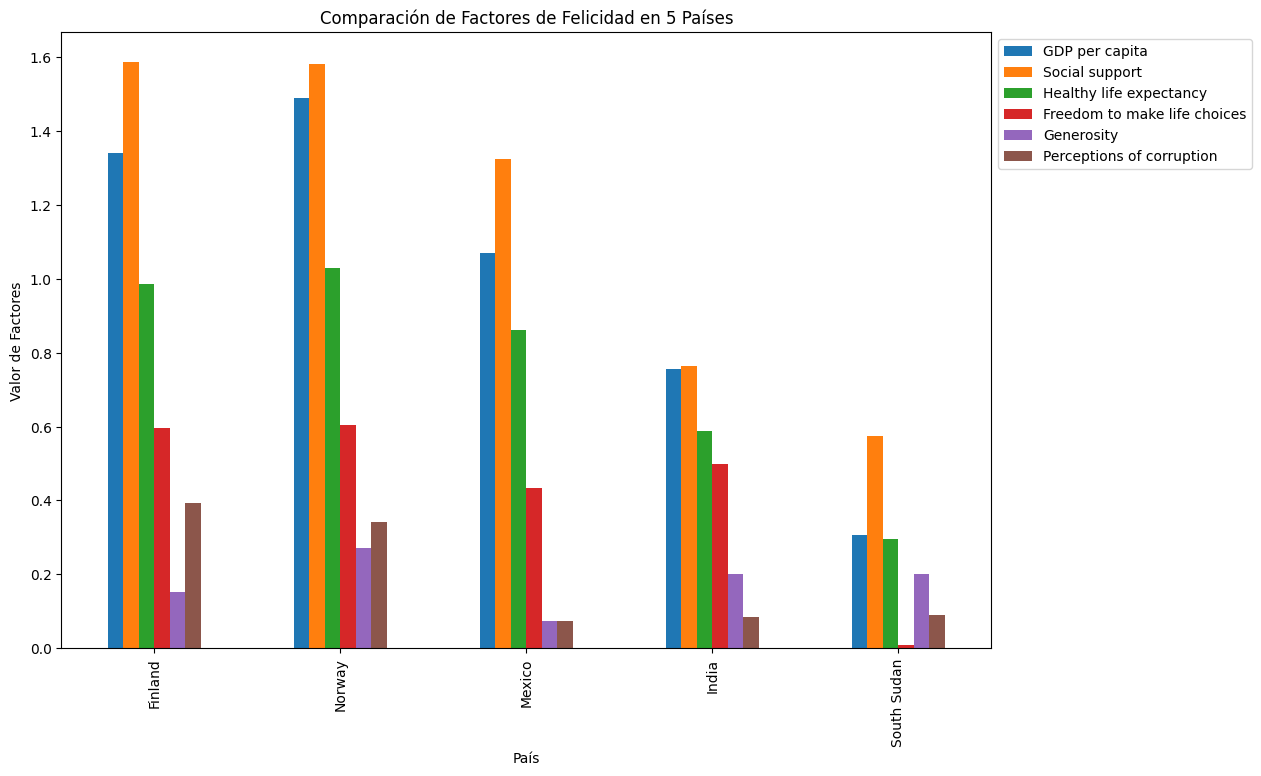

In [7]:
# Seleccionar el país más feliz, el menos feliz, México, y dos más
happiest_country = happiness.iloc[happiness['Score'].idxmax()]
least_happy_country = happiness.iloc[happiness['Score'].idxmin()]
selected_countries = happiness[happiness['Country or region'].isin(['Mexico', happiest_country['Country or region'], least_happy_country['Country or region'], 'Norway', 'India'])]
selected_countries = selected_countries.set_index('Country or region')

# Gráfica de barras para los 6 factores en los 5 países seleccionados
selected_factors = selected_countries[factors]

selected_factors.plot(kind='bar', figsize=(12, 8))
plt.title('Comparación de Factores de Felicidad en 5 Países')
plt.xlabel('País')
plt.ylabel('Valor de Factores')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


7. Matriz de Subgráficas con Scatter Plots del Score vs. Factores


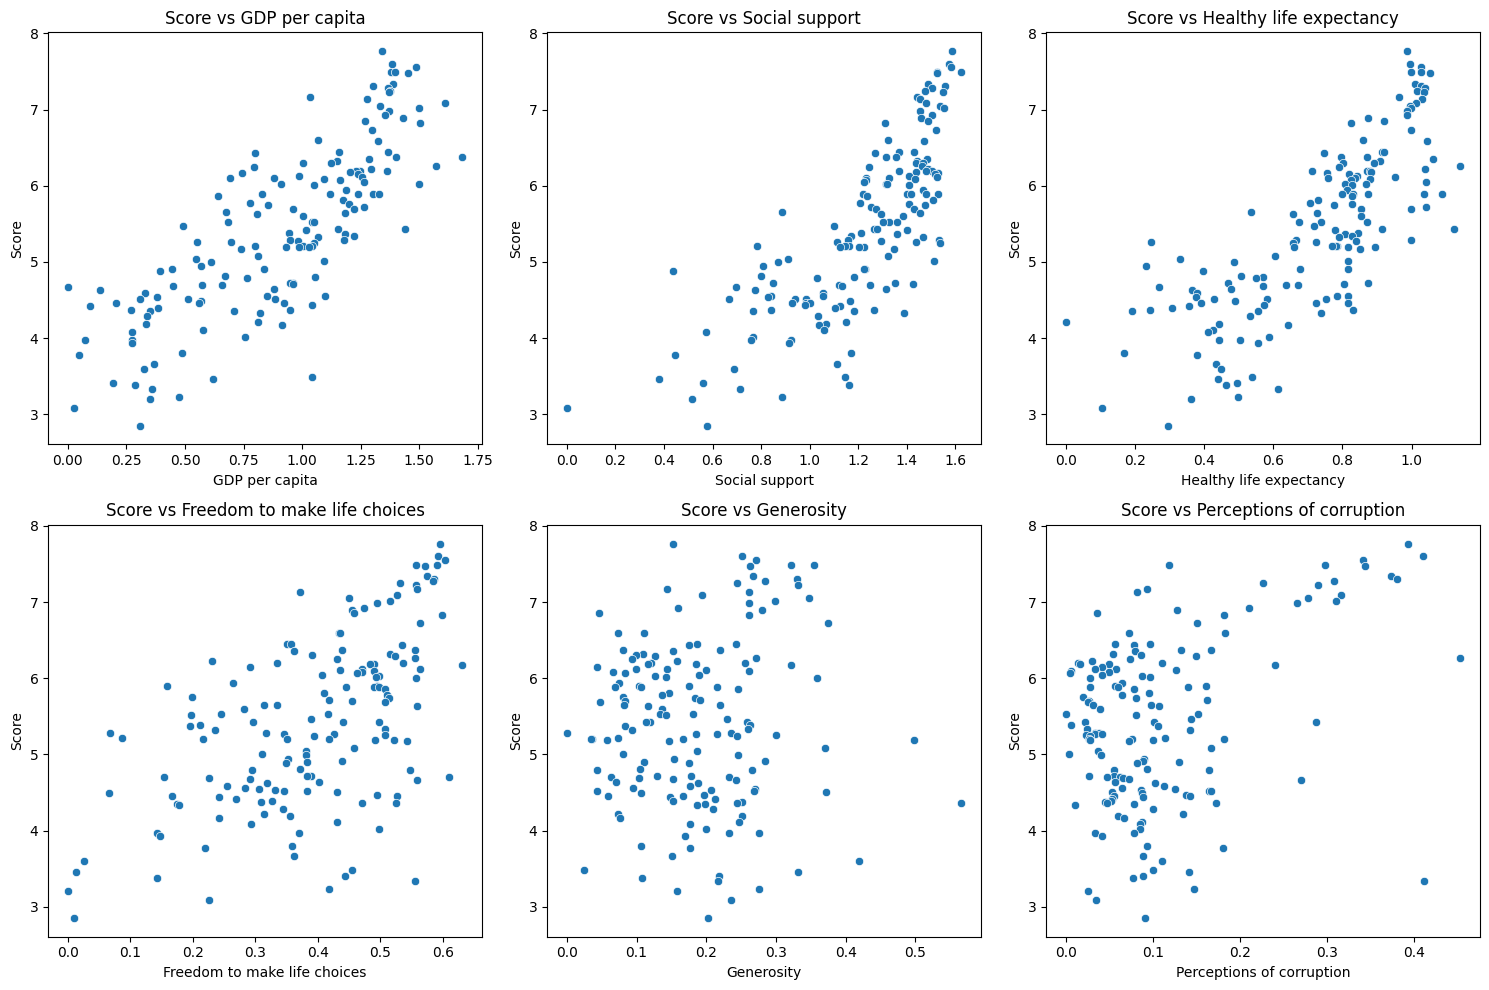

In [8]:
# Crear una matriz de subgráficas 2x3 de scatter plots para score vs factores
plt.figure(figsize=(15, 10))
for i, factor in enumerate(factors, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=happiness, x=factor, y='Score')
    plt.title(f'Score vs {factor}')

plt.tight_layout()
plt.show()


8. Combinar con Metadata y Graficar Felicidad Promedio por Región


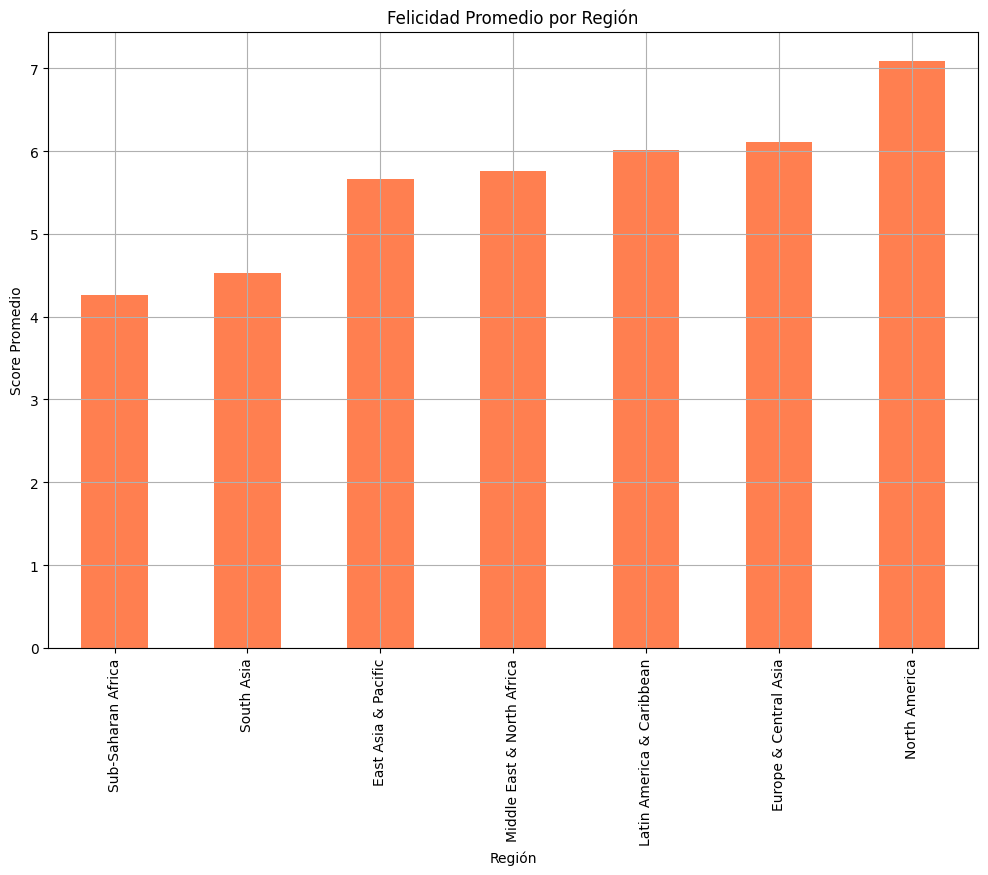

In [12]:
# Leer el archivo de metadata y combinar con el dataframe de felicidad
metadata = pd.read_csv('Metadata.csv')

# Combinación y cálculo de la felicidad promedio por región
combined = happiness.merge(metadata, left_on='Country or region', right_on='TableName')
region_avg = combined.groupby('Region')['Score'].mean().sort_values()

# Gráfica de barras de la felicidad promedio por región
plt.figure(figsize=(12, 8))
region_avg.plot(kind='bar', color='coral')
plt.title('Felicidad Promedio por Región')
plt.xlabel('Región')
plt.ylabel('Score Promedio')
plt.grid(True)
plt.show()
